# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:120%;text-align:center;border-radius:10px 10px;">Kmeans clustering from scratch</p>

In [9]:
import numpy as np
import pandas as pd

# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:120%;text-align:center;border-radius:10px 10px;">Model code</p>

In [10]:
class Kmeans:
    """
    One of the Clustering methods part of unsupervised models.
    """
    def __init__(self, n_clucters, iteration = 500, eval_metric = "inertia", n_kmenas=100):
        """
        :param n_cluster: number of clusters should use.
        :param iteration: number of time the kmeans should work on the given data.
        :param eval_metric: Evaluation metric to qualify the clusters. Can be inertia, dann_index, cost_fun.
        :param n_kmens: run the kmeans this much time to get the best clusters.
        """
        self.c = None # Centroid points value
        self.m = None # number of samples
        self.n = None # number of features
        self.n_clusters = n_clucters
        self.max_iteration = iteration
        self.eval_metrix = eval_metric
        self.n_kmeans = n_kmenas
        
    
    def _init_clusters(self, X):
        """ Intializa the centroids at the very beginning randomly"""
        centroid_points = np.random.choice(range(0,self.m), self.n_clusters, replace=False) # replace= False won't choise the same 2 centroids
        centroids = X[centroid_points].astype(np.float)
        return centroids


    def _euclidean_distance(self, x, y):
        """
        Find the euclidean distance of two data points.

        :param x: this a array which specifies the x data point. (2 or more)
        :param y: this a array which specifies the y data point. (2 or more)
        """
        return np.linalg.norm(x - y) #default norm parameter is 2 and L2 norm is also called euclidean distance.


    def _find_centroid(self, x, centroids):
        """ Find the closest centroid for given sample x"""
        distance = []
        for centroid in centroids:
            distance.append(self._euclidean_distance(x, centroid))
        return np.argmin(np.array(distance)) # return the index of smaller distance centroid (0 - k-1)


    def _update_centroid(self, samples_inthat_cluster):
        """ Update the centroid based ont the average value of each feature"""
        centroid = []
        for f in range(self.n):
            centroid.append(np.mean(samples_inthat_cluster[:, f]))
        return centroid

    def _find_inertia(self, X, centroids, x_centroids):
        """ FInd inertia of the clusters """
        # this can be find sum(all samples  distance to it's centroid)
        distance = []
        for index in range(0, self.m):
            sample, centroid = X[index], centroids[x_centroids[index]]
            dis = self._euclidean_distance(sample, centroid)
            distance.append(dis)
        
        return np.sum(np.array(distance))

    def _evalute(self, X, centroids, x_centroids, eval_metix):
        """ Evaluate how well the model did clustering """
        if eval_metix == "inertia":
            value = self._find_inertia(X, centroids, x_centroids)
        return value


    def single_train(self, X):
        """
        Method for training the data --split the data into clusters.

        :param X: train data.
                
        Steps:
        * Randomly choice #n_clucters datapoint as centroids.
        * For each data find the distance between that data and every centroid -- assign the sample to one of the centroids which has low dis.
        * update the centroids -- by the mean of distance of the samples and that centroid.
        * repeat 2 & 3 for 
        """
        X = np.array(X)
        self.m = X.shape[0]
        self.n = X.shape[1]
        # initialize the centroids.
        centroids = self._init_clusters(X)
        #print(centroids)
        
        # run it for max iteration or until it converges.
        for _ in range(self.max_iteration):
            # save the current centroid for coniditon check.
            previous_centroid = centroids.copy()
            # find the centroids each samples belong to.
            x_centroids = [self._find_centroid(sample, centroids) for sample in X]
            #print(x_centroids)

            # update the centroid
            for i in range(0, self.n_clusters):
                samples_inthat_cluster = X[np.where(np.array(x_centroids) == i)[0]]
                #print(samples_inthat_cluster)
                centroids[i] = self._update_centroid(samples_inthat_cluster)
                #print(centroids)
            # if no cluster centroids has changed --> means it converged.
            #print("current centroid",centroids,"previou centroid", previous_centroid)
            diff = centroids - previous_centroid
            if not diff.any():
                break
        
        # find the inertia.
        inertia = self._evalute(X, centroids, x_centroids, self.eval_metrix)
        return inertia, centroids, x_centroids

    def train(self, X):
        """Train the X and find the clusters"""
        global_cost_func = 999999
        global_centroid = None
        global_x_centroids = None
        # The randome initalization is worse some times -- final cluster output depend on the initialization -- so the initialization of the cluster may change the clusters
        # so we need to do kmeans for multiple times and take the cluster with minimum inertia (diff evaluation metrics can be used here we are using this)
        for km in range(self.n_kmeans):
            print("{:=^100}".format(" Training new kmeans " ), end="---->")
            print(km)
            # fit the kmeans model and get the cost function value and centroids.
            cost_fun, centroids, x_centroids = self.single_train(X)
            # if the cost function is low than update the centroids and x centroid points.
            print("Evaluation metric of this kmeans --->",cost_fun)
            if cost_fun < global_cost_func:
                global_cost_func = cost_fun
                global_centroid = centroids
                global_x_centroids = x_centroids

        self.c = global_centroid
        
        return global_x_centroids
            

        

In [11]:
data = np.array([[1,2], [3,4] ,[6,6], [7,8], [2,3], [4,2], [8,8] , [9,6]])
data = pd.DataFrame(data)
kmeans = Kmeans(n_clucters=2, n_kmenas=10)
kmeans.train(X=data)


======================================= Training new kmeans ========================================---->0
Evaluation metric of this kmeans ---> 11.101029415372038
======================================= Training new kmeans ========================================---->1
Evaluation metric of this kmeans ---> 11.101029415372038
======================================= Training new kmeans ========================================---->2
Evaluation metric of this kmeans ---> 11.101029415372038
======================================= Training new kmeans ========================================---->3
Evaluation metric of this kmeans ---> 11.101029415372038
======================================= Training new kmeans ========================================---->4
Evaluation metric of this kmeans ---> 11.101029415372038
======================================= Training new kmeans ========================================---->5
Evaluation metric of this kmeans ---> 11.101029415372038
================

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0, 0, 1, 1, 0, 0, 1, 1]

# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:120%;text-align:center;border-radius:10px 10px;">Load data</p>

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns


# don't need y here 
X, y = make_blobs(n_samples=50, centers=3, n_features=2,
                   random_state=0)



# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Find cluster using sklearn k-means</p>

In [13]:
from sklearn.cluster import KMeans as kMeans_sklearn
kmean_sklearn = kMeans_sklearn(n_clusters=3)
cluter = kmean_sklearn.fit_predict(X)

# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Plot the clusters</p>

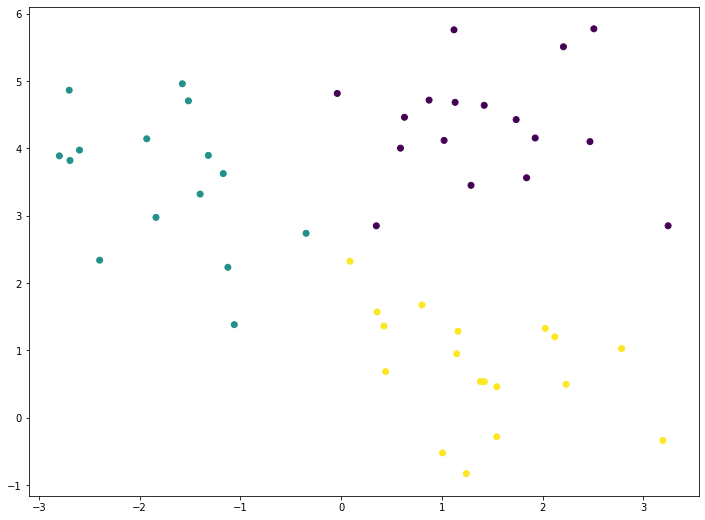

In [14]:
#print(X)
# plot the dataset
plt.figure(figsize=(12,9))
plt.scatter(x=X[:, 0], y=X[:, 1], c=cluter)

# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Kmeans based on my own model :) </p>

======================================= Training new kmeans ========================================---->0
Evaluation metric of this kmeans ---> 52.71973811055067
======================================= Training new kmeans ========================================---->1
Evaluation metric of this kmeans ---> 52.71973811055067
======================================= Training new kmeans ========================================---->2
Evaluation metric of this kmeans ---> 52.71973811055067
======================================= Training new kmeans ========================================---->3
Evaluation metric of this kmeans ---> 52.71973811055067
======================================= Training new kmeans ========================================---->4
Evaluation metric of this kmeans ---> 52.73057753672986
======================================= Training new kmeans ========================================---->5
Evaluation metric of this kmeans ---> 52.73057753672986
======================

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


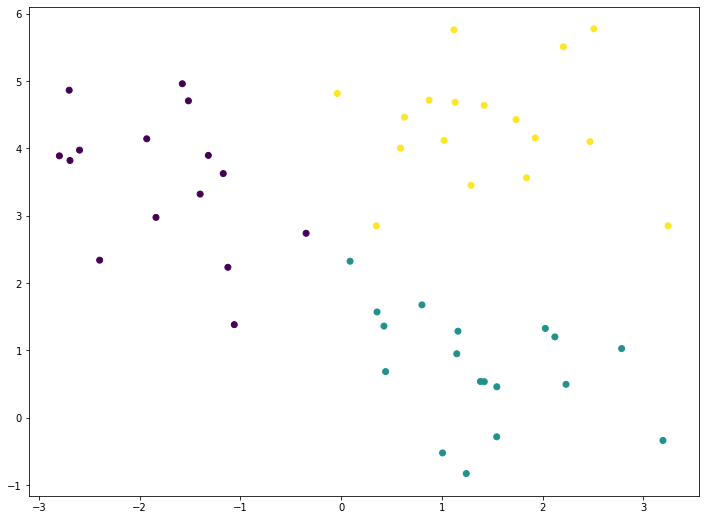

In [15]:
kmeans = Kmeans(n_clucters=3, n_kmenas=10)
y_pred = kmeans.train(X)

#plot the cluster based on my own Kmeans model
plt.figure(figsize=(12,9))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y_pred)
print(y_pred)

# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Both are 99% same :) :) -- My model is clustering well </p>

**<span style="color:#5811D3;"> If you like this Notebook -- please do upvote</span>**

**<span style="color:#5811D3;">If you have any questions -- Comment it</span>**


<img src='https://c.tenor.com/npsLhz89w5AAAAAC/yes-i-did-it-success.gif'>

you can also check....
# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Supervised Machine Learning models scratch series.... </p>



- 1) Linear Regression         ---> https://www.kaggle.com/ninjaac/linear-regression-from-scratch
- 2) Lasso Regression          ---> https://www.kaggle.com/ninjaac/lasso-ridge-regression 
- 3) Ridge Regression          ---> https://www.kaggle.com/ninjaac/lasso-ridge-regression 
- 4) ElasticNet Regression     ---> https://www.kaggle.com/ninjaac/elasticnet-regression 
- 5) Polynomail Regression     ---> https://www.kaggle.com/ninjaac/polynomial-and-polynomialridge-regression 
- 5) PolynomailRidge Regression---> https://www.kaggle.com/ninjaac/polynomial-and-polynomialridge-regression 
- 6) KNN Classifier            ---> https://www.kaggle.com/ninjaac/knnclassifier-from-scratch 

# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Unsupervised Machine learning models .... </p>

- 1) Kmeans                    ---> https://www.kaggle.com/ninjaac/scratch-kmeans-from-scratch (Same Notebook you are looking now)
- 2) Hierartical clustering ------ loading
